In [ ]:
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
from matplotlib.pyplot import figure
from plotly.offline import init_notebook_mode , iplot
import plotly.graph_objects as go
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Startups.csv to Startups.csv


In [ ]:
import io
Startups=pd.read_csv(io.BytesIO(uploaded['Startups.csv']))

In [ ]:
Startups.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [ ]:
Startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        936 non-null    int64 
 1   Company           936 non-null    object
 2   Valuation ($B)    936 non-null    object
 3   Date Joined       936 non-null    object
 4   Country           936 non-null    object
 5   City              921 non-null    object
 6   Industry          936 non-null    object
 7   Select Investors  935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [ ]:
Startups.isna().sum()

Unnamed: 0           0
Company              0
Valuation ($B)       0
Date Joined          0
Country              0
City                15
Industry             0
Select Investors     1
dtype: int64

In [ ]:
Startups.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,936.0,467.5,270.344225,0.0,233.75,467.5,701.25,935.0


In [ ]:
Startups.shape

(936, 8)

In [ ]:
# lets perform some data cleaning
# rename the columns
Startups.rename(columns={'Date Joined': 'Date',
                         'Valuation ($B)': 'Valuation',
                          'Select Investors': 'Investors'}, inplace=True)
Startups.head()

,Unnamed: 0,Company,Valuation,Date,Country,City,Industry,Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [ ]:
Startups['Investors']=Startups['Investors'].to_string()

In [ ]:
date= Startups.Date.str.split('/' , expand=True)
Startups['year']= date[2]
Startups['month']=date[1]
Startups['day']=date[0]
Startups.year=pd.to_numeric(Startups.year)
Startups.month=pd.to_numeric(Startups.month)
Startups.day= pd.to_numeric(Startups.day)

Startups['Valuation']=Startups['Valuation'].str.replace('$','')
Startups['Valuation']=pd.to_numeric(Startups['Valuation'])

In [ ]:
Startups.head()

,Unnamed: 0,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
0,0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2017,7,4
1,1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm...",2012,1,12
2,2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2014,23,1
3,3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2011,12,12
4,4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2018,8,1


In [ ]:
# what type of startups are in different industry

In [ ]:
Startups['Industry'].value_counts()


Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Industry, dtype: int64

<Axes: xlabel='Industry', ylabel='count'>

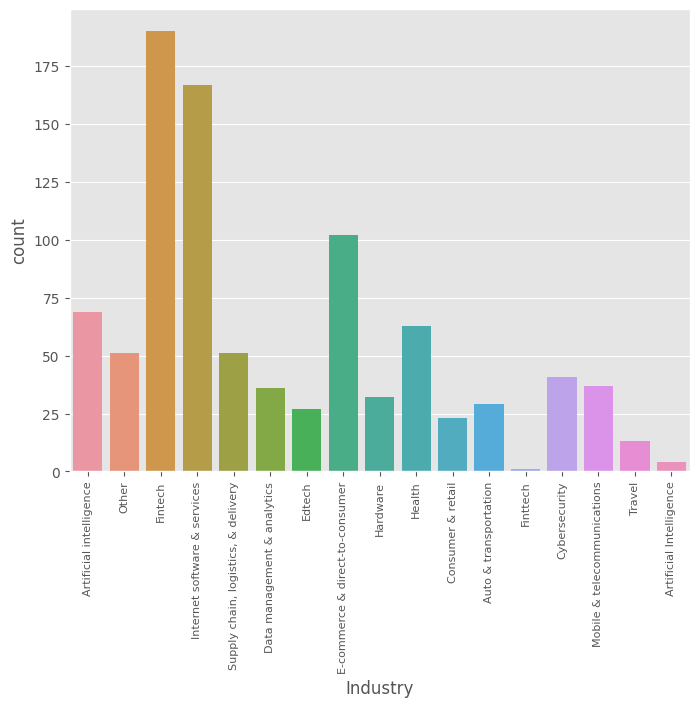

In [ ]:
plt.figure(figsize=(8,6))
plt.xticks(rotation='vertical', size=8)
sns.countplot(Startups,x=Startups['Industry'])

In [ ]:
## years which companies joined the startups

In [ ]:
year_joined= Startups.pivot_table(index='Company',values='year').sort_values(by='year')
year_joined

,year
Company,
Veepee,2007.0
VANCL,2010.0
Klarna,2011.0
Vice Media,2011.0
Avant,2012.0
Fanatics,2012.0
Trendy Group International,2012.0
SpaceX,2012.0
Lookout,2013.0


In [ ]:
# startups by their country

In [ ]:
country_startups=Startups.groupby(['Company','Country'])
country_startups

In [ ]:
pd.DataFrame(country_startups)

,0,1
0,"(1, Brazil)",Unnamed: 0 Company Valuation Date C...
1,"(1047 Games, United States)",Unnamed: 0 Company Valuation D...
2,"(1KMXC, China)",Unnamed: 0 Company Valuation Date ...
3,"(1Password, Canada)",Unnamed: 0 Company Valuation Dat...
4,"(4Paradigm, China)",Unnamed: 0 Company Valuation D...
5,"(56PINGTAI, China)",Unnamed: 0 Company Valuation Da...
6,"(58 Daojia, China)",Unnamed: 0 Company Valuation D...
7,"(6Sense, United States)",Unnamed: 0 Company Valuation Date ...
8,"(ABL Space Systems, United States)",Unnamed: 0 Company Valuation ...
9,"(AIWAYS, China)",Unnamed: 0 Company Valuation Date ...


In [ ]:
# startups in china
China=Startups[Startups['Country']=='China']
China

,Unnamed: 0,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
0,0,Bytedance,140.00,4/7/2017,China,Beijing,Artificial intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2017,7,4
13,13,Xiaohongshu,20.00,3/31/2016,China,Shanghai,E-commerce & direct-to-consumer,"0 Sequoia Capital China, SIG Asia Investm...",2016,31,3
16,16,Yuanfudao,15.50,5/31/2017,China,Beijing,Edtech,"0 Sequoia Capital China, SIG Asia Investm...",2017,31,5
17,17,DJI Innovations,15.00,1/23/2015,China,Shenzhen,Hardware,"0 Sequoia Capital China, SIG Asia Investm...",2015,23,1
18,18,SHEIN,15.00,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"0 Sequoia Capital China, SIG Asia Investm...",2018,3,7
26,26,SenseTime,12.00,7/11/2017,China,Shanghai,Artificial intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2017,11,7
28,28,Bitmain Technologies,12.00,7/6/2018,China,Beijing,Hardware,"0 Sequoia Capital China, SIG Asia Investm...",2018,6,7
31,31,ZongMu Technology,11.40,6/3/2021,China,Shanghai,Auto & transportation,"0 Sequoia Capital China, SIG Asia Investm...",2021,3,6
34,34,Weilong,10.88,5/8/2021,China,Luohe,Consumer & retail,"0 Sequoia Capital China, SIG Asia Investm...",2021,8,5
46,46,HEYTEA,9.28,7/1/2019,China,Shenzhen,Other,"0 Sequoia Capital China, SIG Asia Investm...",2019,1,7


In [ ]:
# which company has the highest valuation
company_valuation=Startups.sort_values(by='Valuation', ascending=False).head(10)
company_valuation

,Unnamed: 0,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
0,0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2017,7,4
1,1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm...",2012,1,12
2,2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2014,23,1
3,3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2011,12,12
4,4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2018,8,1
5,5,Instacart,39.0,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","0 Sequoia Capital China, SIG Asia Investm...",2014,30,12
6,6,Databricks,38.0,2/5/2019,United States,San Francisco,Data management & analytics,"0 Sequoia Capital China, SIG Asia Investm...",2019,5,2
7,7,Revolut,33.0,4/26/2018,United Kingdom,London,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2018,26,4
8,8,Nubank,30.0,3/1/2018,Brazil,Sao Paulo,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2018,1,3
9,9,Epic Games,28.7,10/26/2018,United States,Cary,Other,"0 Sequoia Capital China, SIG Asia Investm...",2018,26,10


<Axes: xlabel='Company', ylabel='Valuation'>

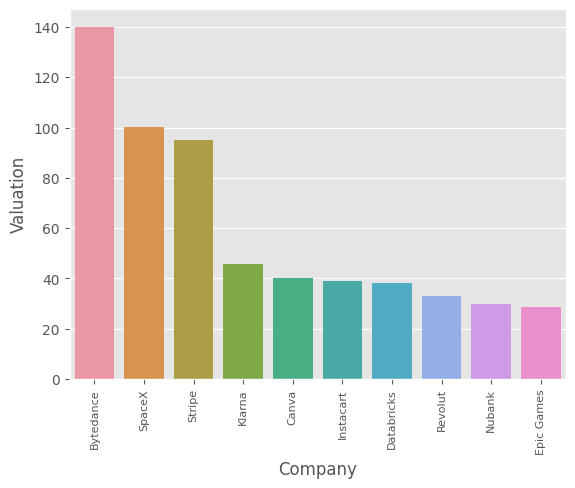

In [ ]:
plt.xticks(rotation='vertical', size=8)
sns.barplot(company_valuation, x='Company',y='Valuation')

In [ ]:
# when was space x founded?
Startups[Startups['Company']=='SpaceX']

,Unnamed: 0,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
1,1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm...",2012,1,12


In [ ]:
# which 10 cities has the most valued startups
cities=Startups.groupby('City').sum().sort_values('Valuation', ascending=False).head(10)
cities=cities.reset_index()
px.bar(x='City',y='Valuation', data_frame=cities)

In [ ]:
# what are the number of unicorn startups in each city
unicorn_counts = Startups.groupby('City')['Company'].nunique().sort_values(ascending=False).head(15)
unicorn_counts

City
San Francisco    134
New York          81
Beijing           62
Shanghai          45
London            28
Bengaluru         25
Shenzhen          18
Berlin            16
Paris             15
Chicago           14
Hangzhou          14
Boston            14
Mountain View     13
Tel Aviv          13
Sao Paulo         11
Name: Company, dtype: int64

In [ ]:
# what startups are based in united states
United_states=Startups[Startups['Country']=='United States']
United_states

,Unnamed: 0,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
1,1,SpaceX,100.30,12/1/2012,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm...",2012,1,12
2,2,Stripe,95.00,1/23/2014,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2014,23,1
5,5,Instacart,39.00,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","0 Sequoia Capital China, SIG Asia Investm...",2014,30,12
6,6,Databricks,38.00,2/5/2019,United States,San Francisco,Data management & analytics,"0 Sequoia Capital China, SIG Asia Investm...",2019,5,2
9,9,Epic Games,28.70,10/26/2018,United States,Cary,Other,"0 Sequoia Capital China, SIG Asia Investm...",2018,26,10
10,10,Chime,25.00,3/5/2019,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2019,5,3
15,15,Fanatics,18.00,6/6/2012,United States,Jacksonville,E-commerce & direct-to-consumer,"0 Sequoia Capital China, SIG Asia Investm...",2012,6,6
20,20,goPuff,15.00,10/8/2020,United States,Philadelphia,E-commerce & direct-to-consumer,"0 Sequoia Capital China, SIG Asia Investm...",2020,8,10
21,21,Plaid Technologies,13.40,12/11/2018,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2018,11,12
22,22,Grammarly,13.00,10/10/2019,United States,San Francisco,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2019,10,10


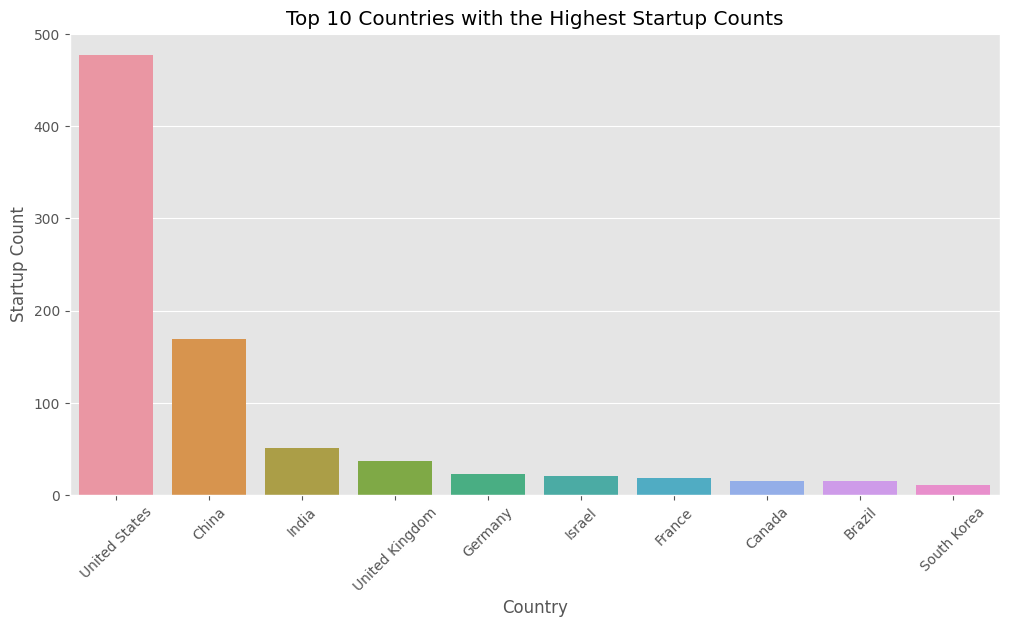

In [ ]:
# how many startups are there in each country
startup_counts = Startups['Country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=startup_counts.index, y=startup_counts.values)
plt.xlabel('Country')
plt.ylabel('Startup Count')
plt.title('Top 10 Countries with the Highest Startup Counts')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# fintech industry based in China
Startups[Startups.Country=="China"][Startups[Startups.Country=="China"].Industry=="Fintech"]["Company"]
# fintech_startups_china = Startups[(Startups['Country'] == 'China') & (Startups['Industry'] == 'Fintech')]['Company']

301            Cgtz
476         Baiwang
588    Huisuanzhang
659            TELD
714         JimuBox
807          WeBull
820      Hyperchain
867        Xiaobing
Name: Company, dtype: object

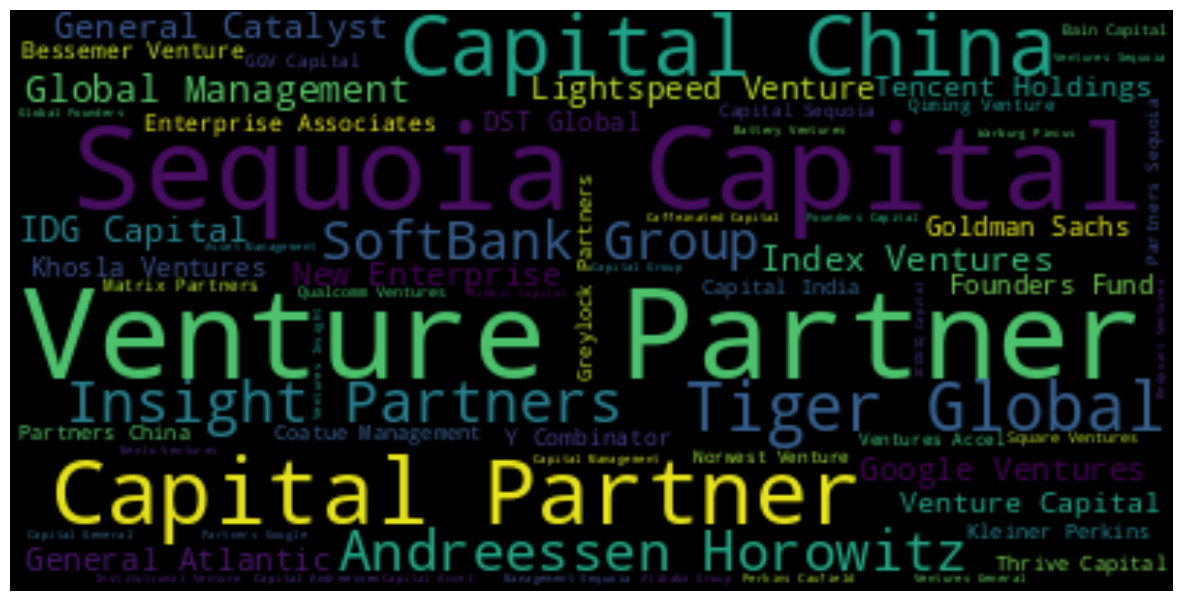

In [ ]:
# wordcloud of investors
from wordcloud import WordCloud


investors_text = ' '.join(Startups['Investors'])
wordcloud = WordCloud().generate(investors_text)

plt.figure(figsize=(15, 8))
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

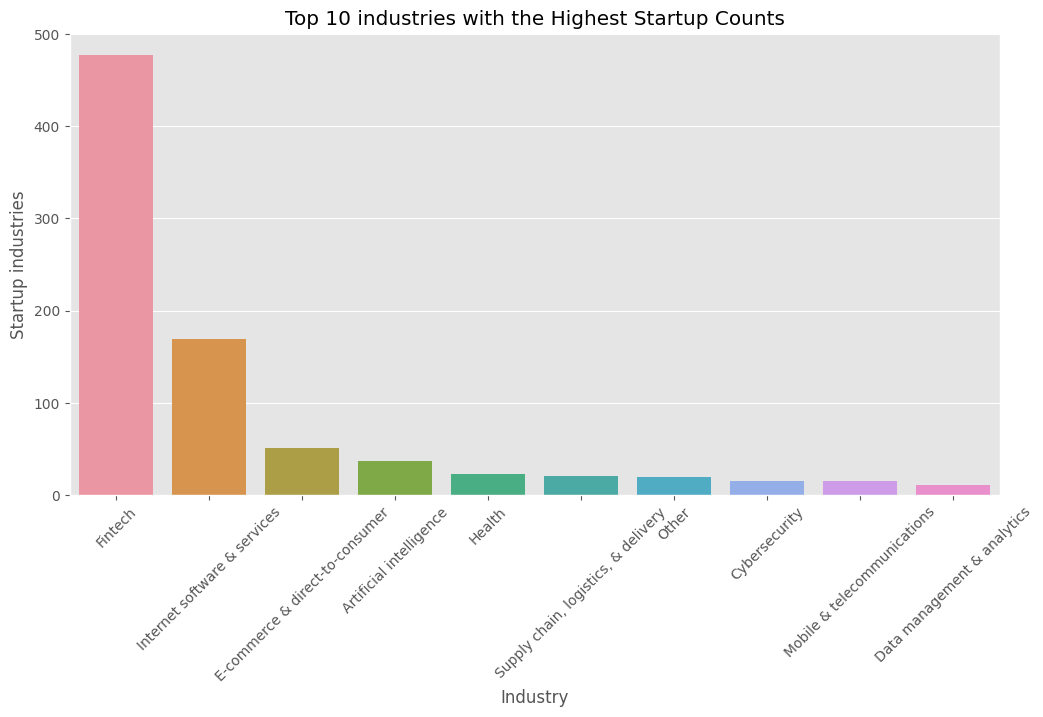

In [ ]:
# which is the most common startup industry
#
startup_industry_counts = Startups['Industry'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=startup_industry_counts.index, y=startup_counts.values)
plt.xlabel('Industry')
plt.ylabel('Startup industries')
plt.title('Top 10 industries with the Highest Startup Counts')
plt.xticks(rotation=45)
plt.show()

In [ ]:
## which startup industry has the highest valuation
industry_valuation= Startups.groupby('Industry')['Valuation'].sum().sort_values(ascending=False)
industry_valuation


Industry
Fintech                                734.13
Internet software & services           483.76
Artificial intelligence                308.14
E-commerce & direct-to-consumer        291.10
Other                                  245.46
Health                                 166.26
Supply chain, logistics, & delivery    146.29
Data management & analytics            121.70
Cybersecurity                          107.54
Hardware                                98.59
Auto & transportation                   89.30
Edtech                                  85.37
Mobile & telecommunications             79.09
Consumer & retail                       64.13
Travel                                  35.60
Finttech                                10.00
Artificial Intelligence                  4.70
Name: Valuation, dtype: float64

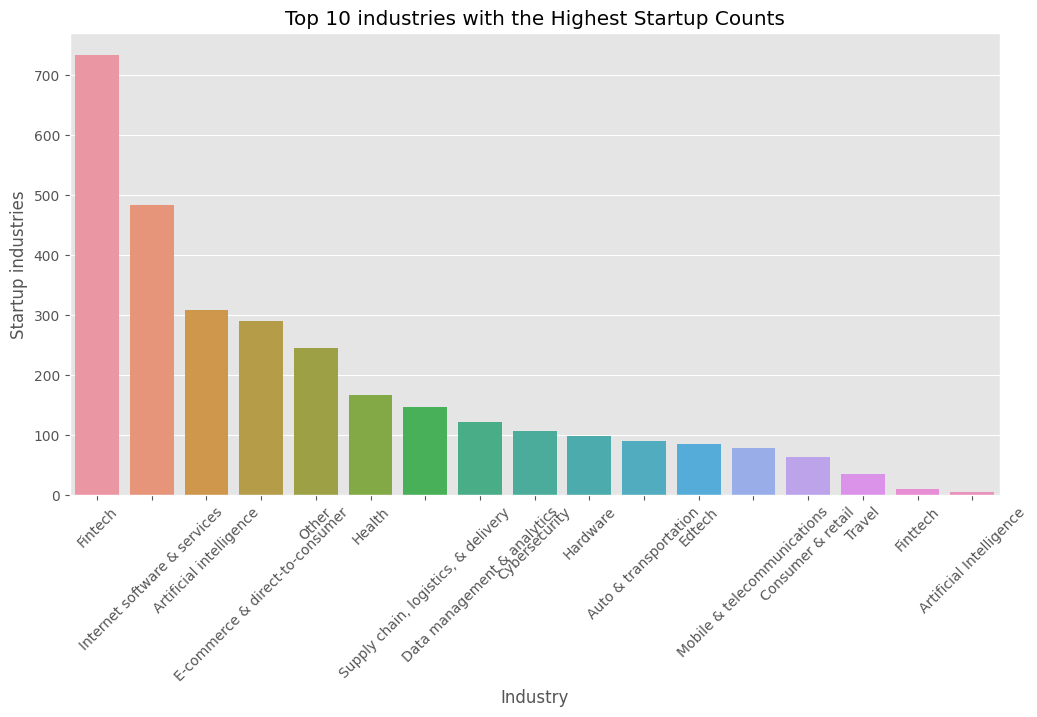

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=industry_valuation.index, y=industry_valuation.values)
plt.xlabel('Industry')
plt.ylabel('Startup industries')
plt.title('Industries with highest valuation')
plt.xticks(rotation=45)
plt.show()